In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
#1
#a
def knn_search(x, D, K, measure):
    if measure == 0:
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        sims = np.dot(D,x)/(D_norm * x_norm)
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    return idx[:K], sorted(dists)[:K]

def classifierResult(x, D, K, measure):
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = trainClasses[neigh_idx]
    neigh_labels = neigh_labels.tolist()
    neigh_labels = sum(neigh_labels, [])
    result = Counter(neigh_labels).most_common(1)[0][0]
    return result

In [3]:
trainMatrix = pd.read_csv('trainMatrixModified.txt', delimiter="\t", header=None)
trainMatrixT = trainMatrix.T
testMatrix = pd.read_csv('testMatrixModified.txt', delimiter="\t", header=None)
testMatrixT = testMatrix.T
trainClasses = pd.read_csv('trainClasses.txt', delimiter="\t", header=None, index_col=0)
testClasses = pd.read_csv('testClasses.txt', delimiter="\t", header=None, index_col=0)


trainMatrixT = np.array(trainMatrixT)
testMatrixT = np.array(testMatrixT)
trainClasses = np.array(trainClasses)
testClasses = np.array(testClasses)

In [4]:
#Example:
neigh_idx, distances = knn_search(testMatrixT[0], trainMatrixT, 5, 0)
print(neigh_idx, distances)
print("\n")
result = classifierResult(testMatrixT[0], trainMatrixT, 5, 0)
print(result)

[685 628 703 266 510] [13.341664064126334, 15.329709716755891, 15.394804318340652, 15.620499351813308, 15.652475842498529]


1


In [7]:
#b
def accuracyCalculator(X, D, K, measure):
    correctCount = 0.0
    numTestVecs = len(X)
    for i in range(numTestVecs):
        result = classifierResult(X[i], D, K, measure)
        if result == testClasses[i]:
            correctCount += 1.0
    accuracy = correctCount/float(numTestVecs)
    return accuracy

In [8]:
#Example
accuracy = accuracyCalculator(testMatrixT, trainMatrixT, 5, 0)
accuracy

0.815

In [9]:
#c
#Euclidean Distance
ED = []
K = []
for i in range(1,21):
    K.append(i)
    ED.append(accuracyCalculator(testMatrixT, trainMatrixT, i, 0))

In [10]:
pd.DataFrame(ED ,index = K, columns = ['Accuracy'])

,Accuracy
1,0.780
2,0.780
3,0.810
4,0.810
5,0.815
6,0.835
7,0.765
8,0.800
9,0.750
10,0.850


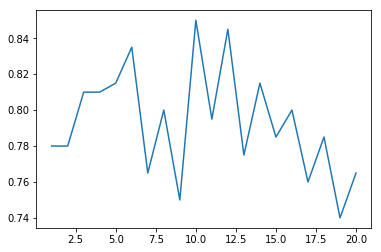

In [11]:
plt.plot(K, ED)

In [12]:
ED = np.array(ED)
ED.max()

0.84999999999999998

In [13]:
#Cosine Similarity
CS = []
K = []
for i in range(1,21):
    K.append(i)
    CS.append(accuracyCalculator(testMatrixT, trainMatrixT, i, 1))

In [14]:
pd.DataFrame(CS ,index = K, columns = ['Accuracy'])

,Accuracy
1,0.985
2,0.985
3,0.970
4,0.985
5,0.970
6,0.985
7,0.980
8,0.980
9,0.975
10,0.985


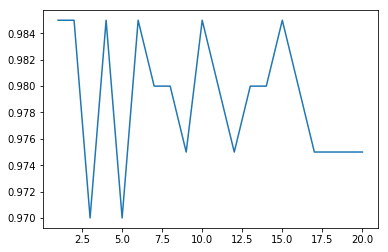

In [15]:
plt.plot(K, CS)

In [16]:
CS = np.array(CS)
CS.max()

0.98499999999999999

# When K = 10, the accuracy is the highest 0.85 in terms of using Euclidean Distance
# When K = 1, 2, 4, 6, 10, 15, the accuracy is the highest 0.985 in terms of using Cosine Similarity

In [17]:
#d
#transform the data to TFxIDF weights
TMT = np.array([(trainMatrix!=0).sum(1)]).T
TMT

array([[50],
       [ 7],
       [10],
       ..., 
       [ 2],
       [ 2],
       [ 2]])

In [18]:
numTerms=trainMatrix.shape[0]
NDocs = trainMatrix.shape[1]
print(numTerms)
print(NDocs)

5500
800


In [19]:
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(trainMatrix), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

[[ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 ..., 
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]]


In [20]:
# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, TMT))
print(IDF)

[[ 4.    4.    4.   ...,  4.    4.    4.  ]
 [ 6.84  6.84  6.84 ...,  6.84  6.84  6.84]
 [ 6.32  6.32  6.32 ...,  6.32  6.32  6.32]
 ..., 
 [ 8.64  8.64  8.64 ...,  8.64  8.64  8.64]
 [ 8.64  8.64  8.64 ...,  8.64  8.64  8.64]
 [ 8.64  8.64  8.64 ...,  8.64  8.64  8.64]]


In [21]:
# Finally compute the TFxIDF values for each document-term entry
trainMatrix_tfidf = trainMatrix * IDF
pd.set_option("display.precision", 2)
trainMatrix_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,8.00,0.00,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,13.67,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.51,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,12.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,23.11,2.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.78,0.0,0.0,0.0,0.0,0.0,0.0,2.89


In [22]:
#Do TFxIDF transformation to testing
MMatrix=np.ones(np.shape(testMatrix), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
IDF2 = np.log2(np.divide(MMatrix, TMT))

testMatrix_tfidf = testMatrix * IDF2
pd.set_option("display.precision", 2)
testMatrix_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.78,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
trainMatrix_tfidfT = trainMatrix_tfidf.T
testMatrix_tfidfT = testMatrix_tfidf.T
trainMatrix_tfidfT = np.array(trainMatrix_tfidfT)
testMatrix_tfidfT = np.array(testMatrix_tfidfT)

In [24]:
#Euclidean Distance
ED_tfidf = []
K = []
for i in range(1,21):
    K.append(i)
    ED_tfidf.append(accuracyCalculator(testMatrix_tfidfT, trainMatrix_tfidfT, i, 0))

In [25]:
pd.DataFrame(ED_tfidf ,index = K, columns = ['Accuracy'])

,Accuracy
1,0.71
2,0.71
3,0.75
4,0.71
5,0.80
6,0.82
7,0.73
8,0.74
9,0.68
10,0.76


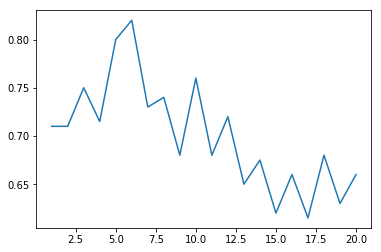

In [26]:
plt.plot(K, ED_tfidf)

In [27]:
ED_tfidf = np.array(ED_tfidf)
ED_tfidf.max()

0.81999999999999995

In [28]:
#Cosine Similarity
CS_tfidf = []
K = []
for i in range(1,21):
    K.append(i)
    CS_tfidf.append(accuracyCalculator(testMatrix_tfidfT, trainMatrix_tfidfT, i, 1))

In [29]:
pd.DataFrame(CS_tfidf ,index = K, columns = ['Accuracy'])

,Accuracy
1,0.94
2,0.94
3,0.98
4,0.97
5,0.98
6,0.98
7,0.98
8,0.98
9,0.99
10,0.99


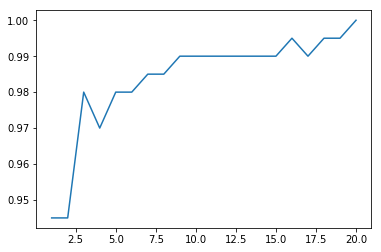

In [30]:
plt.plot(K, CS_tfidf)

In [31]:
CS_tfidf = np.array(CS_tfidf)
CS_tfidf.max()

1.0

# Using TFxIDF weights gives me higher accuracy 1 in terms of using cosine similarity. However, Using TFxIDF weights decreases the accuracy in terms of using Euclidean distance.

In [32]:
#e
def RocchioTrain(train, trainclass):
    Num = len(train)
    proto0 = np.zeros((1, 5500))
    proto1 = np.zeros((1, 5500))
    for i in range(Num):
        if trainclass[i] == 0:
            proto0 = proto0 + train[i]
        elif trainclass[i] == 1:
            proto1 = proto1 + train[i]
    return proto0, proto1

def RocchioTest(test, proto0, proto1):
    proto0_norm = np.array([np.linalg.norm(proto0[i]) for i in range(len(proto0))])
    test_norm = np.linalg.norm(test)
    sims0 = np.dot(proto0,test)/(proto0_norm * test_norm)
    dist0 = 1 - sims0
    
    proto1_norm = np.array([np.linalg.norm(proto1[i]) for i in range(len(proto1))])
    sims1 = np.dot(proto1,test)/(proto1_norm * test_norm)
    dist1 = 1 - sims1
    
    if dist0 < dist1:
        c = 0
    else:
        c = 1
    return c

In [33]:
proto0, proto1 = RocchioTrain(trainMatrix_tfidfT, trainClasses)

In [34]:
def accuracyCalculatorForRocchio(X):
    correctCount = 0.0
    numTestVecs = len(X)
    for i in range(numTestVecs):
        result = RocchioTest(X[i], proto0, proto1)
        if result == testClasses[i]:
            correctCount += 1.0
    accuracy = correctCount/float(numTestVecs)
    return accuracy

In [35]:
accuracyCalculatorForRocchio(testMatrix_tfidfT)

0.98

# the accuracy in Rocchio is 0.98 which is slightly less than the best solution of KNN with cosine similarity

In [36]:
##############################

In [96]:
#2
#a
bank_df = pd.read_csv("bank_data.csv")
bank_df.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [97]:
#Randomization
bank = bank_df.reindex(np.random.permutation(bank_df.index))
bank.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
160,ID12261,23,18875.7,2,MALE,INNER_CITY,YES,YES,YES,YES,NO,NO
378,ID12479,19,17986.8,0,MALE,SUBURBAN,YES,NO,NO,YES,YES,YES
424,ID12525,20,17239.5,1,MALE,TOWN,NO,YES,NO,YES,NO,YES
273,ID12374,31,28409.4,1,MALE,INNER_CITY,YES,YES,NO,YES,NO,YES
15,ID12116,38,22342.1,0,FEMALE,INNER_CITY,YES,YES,YES,YES,YES,NO


In [98]:
bank_names = bank.columns.values
bank_names

array(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car', 'savings_acct',
       'current_acct', 'mortgage', 'pep'], dtype=object)

In [99]:
bank_target = bank.pep

In [100]:
#convert the data to dummy variables
bank = pd.get_dummies(bank[['age', 'income', 'children','gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage']])
bank.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
160,23,18875.7,2,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0
378,19,17986.8,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1
424,20,17239.5,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0
273,31,28409.4,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0
15,38,22342.1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1


In [101]:
tpercent = 0.8
tsize = int(np.floor(tpercent * len(bank)))
bank_train = bank[:tsize]
bank_test = bank[tsize:]
print(bank_train.shape)
print(bank_test.shape)

(480, 19)
(120, 19)


In [102]:
np.set_printoptions(suppress=True, linewidth=120)
bank_train.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
160,23,18875.7,2,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0
378,19,17986.8,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1
424,20,17239.5,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0
273,31,28409.4,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0
15,38,22342.1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1


In [103]:
bank_test.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
526,32,14511.8,2,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1
425,44,30488.7,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0
460,41,23475.6,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1
274,42,27056.5,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
17,46,41016.0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1


In [104]:
bank_target_train = bank_target[0:int(tsize)]
bank_target_test = bank_target[int(tsize):len(bank)]

In [106]:
#b
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(bank_train)
bank_train_norm = min_max_scaler.fit_transform(bank_train)
bank_test_norm = min_max_scaler.fit_transform(bank_test)

In [107]:
np.set_printoptions(precision=2, linewidth=100)
bank_train_norm

array([[ 0.1 ,  0.24,  0.67, ...,  1.  ,  1.  ,  0.  ],
       [ 0.02,  0.22,  0.  , ...,  1.  ,  0.  ,  1.  ],
       [ 0.04,  0.21,  0.33, ...,  1.  ,  1.  ,  0.  ],
       ..., 
       [ 0.18,  0.23,  0.33, ...,  1.  ,  0.  ,  1.  ],
       [ 0.43,  0.51,  0.33, ...,  0.  ,  0.  ,  1.  ],
       [ 0.14,  0.24,  0.33, ...,  1.  ,  1.  ,  0.  ]])

In [108]:
bank_target_train = np.array(bank_target_train)
bank_target_test = np.array(bank_target_test)

In [109]:
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pylab as plt
%matplotlib inline

K = 1
             precision    recall  f1-score   support

         NO       0.64      0.77      0.70        56
        YES       0.75      0.62      0.68        64

avg / total       0.70      0.69      0.69       120



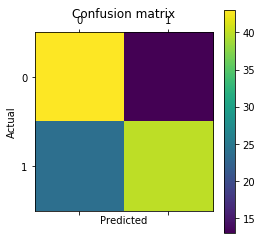

Average accuracy scores:0.691666666667
K = 2
             precision    recall  f1-score   support

         NO       0.64      0.77      0.70        56
        YES       0.75      0.62      0.68        64

avg / total       0.70      0.69      0.69       120



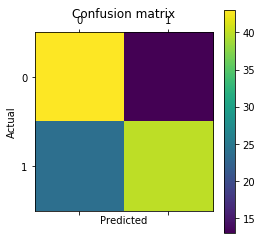

Average accuracy scores:0.691666666667
K = 3
             precision    recall  f1-score   support

         NO       0.65      0.77      0.70        56
        YES       0.76      0.64      0.69        64

avg / total       0.71      0.70      0.70       120



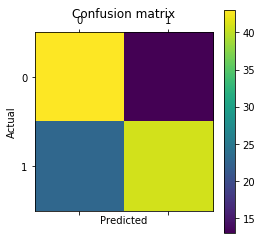

Average accuracy scores:0.7
K = 4
             precision    recall  f1-score   support

         NO       0.66      0.82      0.73        56
        YES       0.80      0.62      0.70        64

avg / total       0.73      0.72      0.72       120



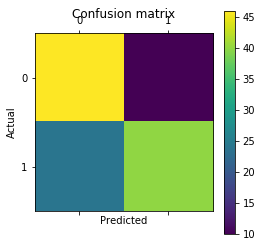

Average accuracy scores:0.716666666667
K = 5
             precision    recall  f1-score   support

         NO       0.63      0.82      0.71        56
        YES       0.79      0.58      0.67        64

avg / total       0.71      0.69      0.69       120



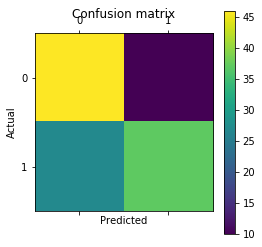

Average accuracy scores:0.691666666667
K = 6
             precision    recall  f1-score   support

         NO       0.62      0.80      0.70        56
        YES       0.77      0.58      0.66        64

avg / total       0.70      0.68      0.68       120



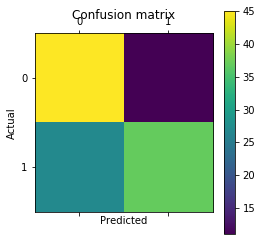

Average accuracy scores:0.683333333333
K = 7
             precision    recall  f1-score   support

         NO       0.64      0.79      0.70        56
        YES       0.76      0.61      0.68        64

avg / total       0.71      0.69      0.69       120



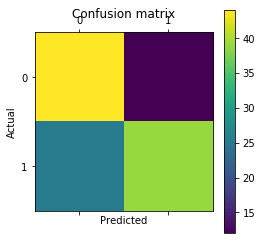

Average accuracy scores:0.691666666667
K = 8
             precision    recall  f1-score   support

         NO       0.63      0.77      0.69        56
        YES       0.75      0.61      0.67        64

avg / total       0.70      0.68      0.68       120



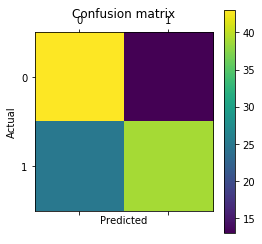

Average accuracy scores:0.683333333333
K = 9
             precision    recall  f1-score   support

         NO       0.63      0.80      0.71        56
        YES       0.78      0.59      0.67        64

avg / total       0.71      0.69      0.69       120



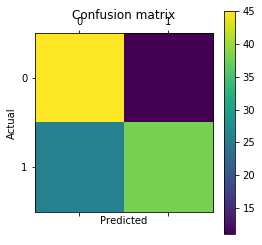

Average accuracy scores:0.691666666667
K = 10
             precision    recall  f1-score   support

         NO       0.61      0.79      0.69        56
        YES       0.75      0.56      0.64        64

avg / total       0.69      0.67      0.66       120



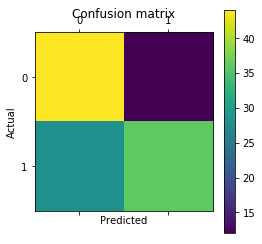

Average accuracy scores:0.666666666667


In [111]:
#with distance weighting
for i in range(1,11):
    n_neighbors = i
    knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    knnclf.fit(bank_train_norm, bank_target_train)
    knnpreds_test = knnclf.predict(bank_test_norm)
    print('K = ' + str(i))
    print(classification_report(bank_target_test, knnpreds_test))
    knncm = confusion_matrix(bank_target_test, knnpreds_test)
    plt.matshow(knncm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    print('Average accuracy scores:' + str(knnclf.score(bank_test_norm, bank_target_test)))

K = 1
             precision    recall  f1-score   support

         NO       0.64      0.77      0.70        56
        YES       0.75      0.62      0.68        64

avg / total       0.70      0.69      0.69       120



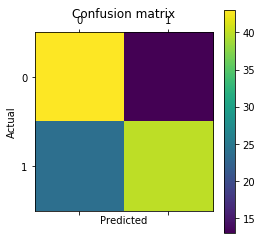

Average accuracy scores:0.691666666667
K = 2
             precision    recall  f1-score   support

         NO       0.57      0.89      0.69        56
        YES       0.81      0.41      0.54        64

avg / total       0.70      0.63      0.61       120



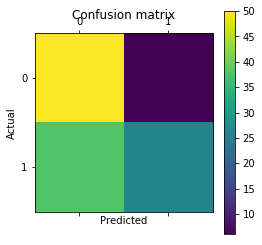

Average accuracy scores:0.633333333333
K = 3
             precision    recall  f1-score   support

         NO       0.62      0.75      0.68        56
        YES       0.73      0.59      0.66        64

avg / total       0.68      0.67      0.67       120



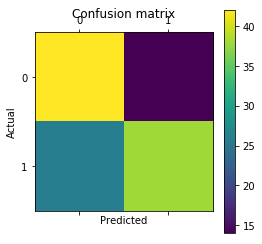

Average accuracy scores:0.666666666667
K = 4
             precision    recall  f1-score   support

         NO       0.55      0.88      0.68        56
        YES       0.77      0.38      0.51        64

avg / total       0.67      0.61      0.58       120



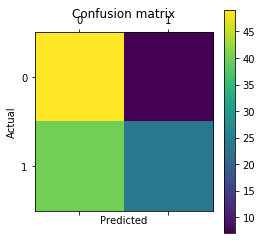

Average accuracy scores:0.608333333333
K = 5
             precision    recall  f1-score   support

         NO       0.60      0.77      0.67        56
        YES       0.73      0.55      0.62        64

avg / total       0.67      0.65      0.65       120



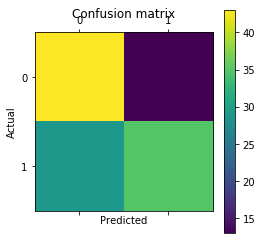

Average accuracy scores:0.65
K = 6
             precision    recall  f1-score   support

         NO       0.55      0.88      0.68        56
        YES       0.77      0.38      0.51        64

avg / total       0.67      0.61      0.58       120



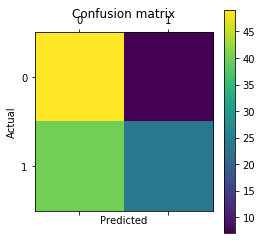

Average accuracy scores:0.608333333333
K = 7
             precision    recall  f1-score   support

         NO       0.61      0.82      0.70        56
        YES       0.77      0.53      0.63        64

avg / total       0.69      0.67      0.66       120



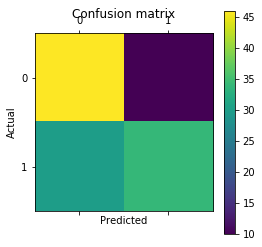

Average accuracy scores:0.666666666667
K = 8
             precision    recall  f1-score   support

         NO       0.55      0.84      0.66        56
        YES       0.74      0.39      0.51        64

avg / total       0.65      0.60      0.58       120



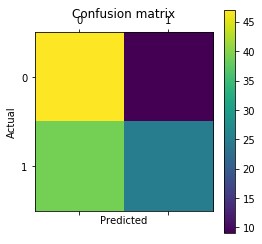

Average accuracy scores:0.6
K = 9
             precision    recall  f1-score   support

         NO       0.61      0.82      0.70        56
        YES       0.77      0.53      0.63        64

avg / total       0.69      0.67      0.66       120



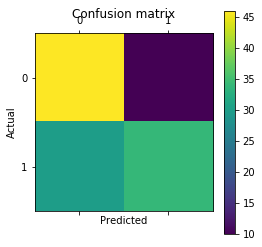

Average accuracy scores:0.666666666667
K = 10
             precision    recall  f1-score   support

         NO       0.57      0.84      0.68        56
        YES       0.76      0.44      0.55        64

avg / total       0.67      0.62      0.61       120



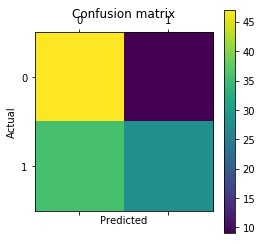

Average accuracy scores:0.625


In [112]:
#without distance weighting
for i in range(1,11):
    n_neighbors = i
    knnclf = neighbors.KNeighborsClassifier(n_neighbors)
    knnclf.fit(bank_train_norm, bank_target_train)
    knnpreds_test = knnclf.predict(bank_test_norm)
    print('K = ' + str(i))
    print(classification_report(bank_target_test, knnpreds_test))
    knncm = confusion_matrix(bank_target_test, knnpreds_test)
    plt.matshow(knncm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    print('Average accuracy scores:' + str(knnclf.score(bank_test_norm, bank_target_test)))

# K = 4, with distance weighting works best on the prediction. The accuracy is 0.72.

             precision    recall  f1-score   support

         NO       0.81      0.77      0.79        56
        YES       0.81      0.84      0.82        64

avg / total       0.81      0.81      0.81       120



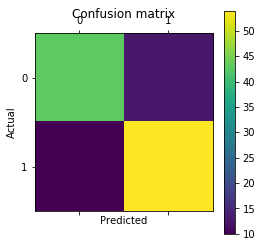

train average accuracy scores:1.0
test average accuracy scores:0.808333333333


In [117]:
#c
from sklearn import tree, naive_bayes
#tree
treeclf = tree.DecisionTreeClassifier()
treeclf.fit(bank_train, bank_target_train)
treepreds_test = treeclf.predict(bank_test)
print(classification_report(bank_target_test, treepreds_test))

treecm = confusion_matrix(bank_target_test, treepreds_test)
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('train average accuracy scores:' + str(treeclf.score(bank_train, bank_target_train)))
print('test average accuracy scores:' + str(treeclf.score(bank_test, bank_target_test)))

             precision    recall  f1-score   support

         NO       0.57      0.82      0.67        56
        YES       0.74      0.45      0.56        64

avg / total       0.66      0.62      0.61       120



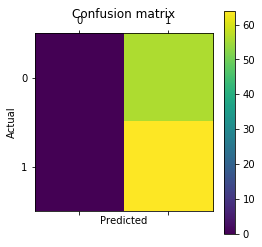

train average accuracy scores:0.645833333333
test average accuracy scores:0.625


In [115]:
#Naive Bayes
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(bank_train, bank_target_train)
nbpreds_test = nbclf.predict(bank_test)

print(classification_report(bank_target_test, nbpreds_test))

nbcm = confusion_matrix(bank_target_test, treepreds_test)
plt.matshow(nbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('train average accuracy scores:' + str(nbclf.score(bank_train, bank_target_train)))
print('test average accuracy scores:' + str(nbclf.score(bank_test, bank_target_test)))

# even though the model with decision tree's accuarcy is higher than naive bayes, but decision tree has overfitting issue. In addition, the dataset is of high variance. decision tree isn't sensitive to high variance, however naive bayes is.

# d
# KNN is the best method for this dataset because its F-score is the highest and it won't be affected too much by imbalance data.

In [4]:
#3
#a
adult = pd.read_csv("adult-modified.csv", na_values=["?"])
adult = adult.rename(index=str, columns={"marital-status": "maritalStatus"})
adult.head()

,age,workclass,education,maritalStatus,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


In [5]:
adult.describe(include="all")

,age,workclass,education,maritalStatus,race,sex,hours-per-week,income
count,9802.000000,9412,10000.000000,10000,10000,10000,10000.000000,10000
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,6947,NaN,5017,8556,6703,NaN,7621
mean,38.449806,NaN,10.076600,NaN,NaN,NaN,40.530300,NaN
std,13.611949,NaN,2.548172,NaN,NaN,NaN,12.277197,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,27.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,12.000000,NaN,NaN,NaN,45.000000,NaN


In [6]:
#Remove missing value in categorical attributes
adult[adult.workclass.isnull()].head()

,age,workclass,education,maritalStatus,race,sex,hours-per-week,income
27,NaN,NaN,10,Married,Asian,Male,60,>50K
61,32.0,NaN,4,Married,White,Male,40,<=50K
69,25.0,NaN,10,Single,White,Male,40,<=50K
77,67.0,NaN,6,Married,White,Male,2,<=50K
106,17.0,NaN,6,Single,White,Female,32,<=50K


In [7]:
adult.drop(adult[adult.workclass.isnull()].index, axis=0, inplace=True)

In [8]:
#filling missing value in numeric attributes
adult[adult.age.isnull()].head()

,age,workclass,education,maritalStatus,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
80,NaN,Private,9,Single,White,Male,30,<=50K
89,NaN,Public,16,Single,White,Female,50,>50K


In [9]:
age_mean = adult.age.mean()
adult.age.fillna(age_mean, axis=0, inplace=True)

In [10]:
#relevant statistics
adult.describe(include="all")

,age,workclass,education,maritalStatus,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.364632,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962034,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


(array([  165.,   546.,   634.,  5145.,   950.,  1172.,   567.,   137.,
           64.,    32.]),
 array([  1. ,  10.8,  20.6,  30.4,  40.2,  50. ,  59.8,  69.6,  79.4,
         89.2,  99. ]),
 <a list of 10 Patch objects>)

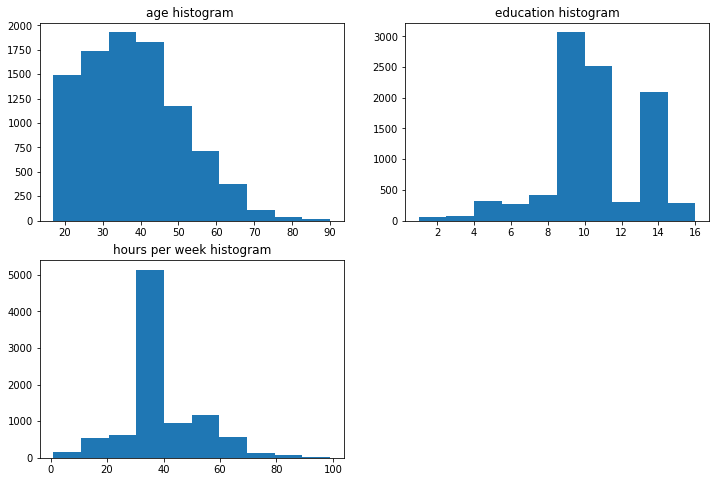

In [11]:
#numeric attributes
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax1.set_title("age histogram ")
plt.hist(adult['age'])

ax1 = fig.add_subplot(222)
ax1.set_title("education histogram")
plt.hist(adult['education'])

ax1 = fig.add_subplot(223)
ax1.set_title("hours per week histogram")
plt.hist(adult['hours-per-week'])


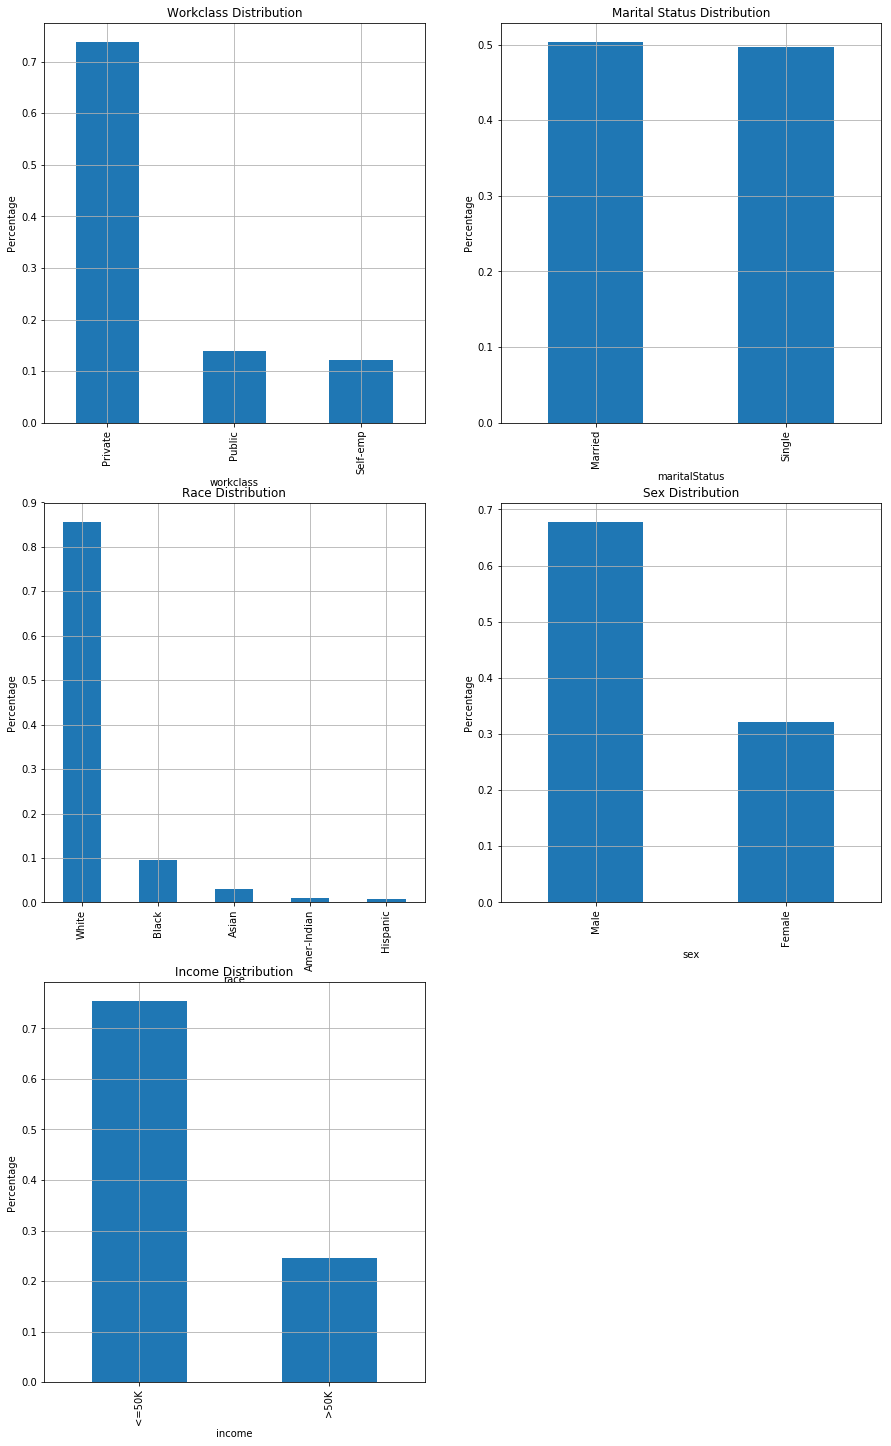

In [12]:
#categorical attributes
temp1 = adult["workclass"].value_counts()/adult["workclass"].count()
temp2 = adult["maritalStatus"].value_counts()/adult["maritalStatus"].count()
temp3 = adult["race"].value_counts()/adult["race"].count()
temp4 = adult["sex"].value_counts()/adult["sex"].count()
temp5 = adult["income"].value_counts()/adult["income"].count()

fig = plt.figure(figsize=(15,25))
ax1 = fig.add_subplot(321)
ax1.set_xlabel('workclass')
ax1.set_ylabel('Percentage')
ax1.set_title("Workclass Distribution")
temp1.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(322)
ax1.set_xlabel('maritalStatus')
ax1.set_ylabel('Percentage')
ax1.set_title("Marital Status Distribution")
temp2.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(323)
ax1.set_xlabel('race')
ax1.set_ylabel('Percentage')
ax1.set_title("Race Distribution")
temp3.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(324)
ax1.set_xlabel('sex')
ax1.set_ylabel('Percentage')
ax1.set_title("Sex Distribution")
temp4.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(325)
ax1.set_xlabel('income')
ax1.set_ylabel('Percentage')
ax1.set_title("Income Distribution")
temp5.plot(kind='bar', grid = True)

In [13]:
#cross-tabulations
print('education + race')
adult.groupby("race").describe()['education'].T

education + race


race,Amer-Indian,Asian,Black,Hispanic,White
count,92.000000,291.000000,892.000000,75.000000,8062.000000
mean,9.119565,10.941581,9.582960,8.853333,10.179112
std,2.026432,2.712682,2.226476,3.069877,2.552060
min,4.000000,2.000000,1.000000,2.000000,1.000000
25%,9.000000,9.000000,9.000000,7.000000,9.000000
50%,9.000000,10.000000,9.000000,9.000000,10.000000
75%,10.000000,13.000000,10.000000,10.000000,13.000000
max,13.000000,16.000000,16.000000,15.000000,16.000000


In [14]:
pd.crosstab(adult["workclass"], adult["income"])

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


In [15]:
RI = pd.crosstab(adult["race"], adult["income"])
RI

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


In [16]:
RI["percent_low"] = RI["<=50K"]/(RI["<=50K"]+RI[">50K"])
RI

income,<=50K,>50K,percent_low
race,,,
Amer-Indian,83,9,0.902174
Asian,224,67,0.769759
Black,773,119,0.866592
Hispanic,69,6,0.920000
White,5944,2118,0.737286


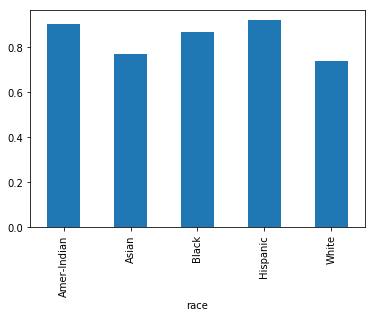

In [17]:
plt.show(RI["percent_low"].plot(kind="bar"))

# Hispanic people are more likely to have low income, and white people are more likely to have high income.

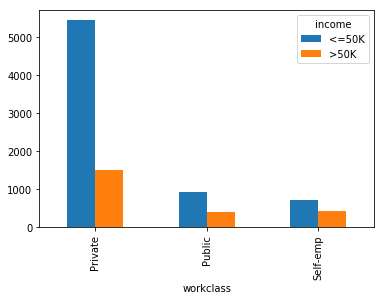

In [18]:
WI = pd.crosstab(adult["workclass"], adult["income"])
plt.show(WI.plot(kind="bar"))

# For every class, it's more likely to have high income

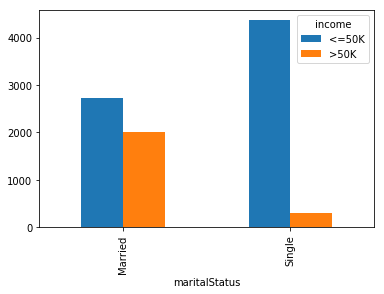

In [19]:
MI = pd.crosstab(adult["maritalStatus"], adult["income"])
plt.show(MI.plot(kind="bar"))

# The difference between high income and low income is huge in terms of single people.

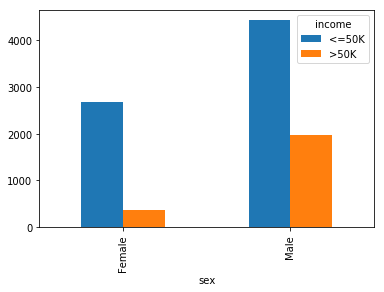

In [20]:
SI = pd.crosstab(adult["sex"], adult["income"])
plt.show(SI.plot(kind="bar"))

# For every kind of sex, it's more likely to have high income

In [21]:
print('education + income')
adult.groupby("income").describe()['education'].T

education + income


income,<=50K,>50K
count,7093.000000,2319.000000
mean,9.646976,11.588185
std,2.397358,2.410764
min,1.000000,2.000000
25%,9.000000,9.000000
50%,9.000000,12.000000
75%,10.000000,13.000000
max,16.000000,16.000000


# The people who have higher education level are more likely to have high income.

In [22]:
print('age + income')
adult.groupby("income").describe()['age'].T

age + income


income,<=50K,>50K
count,7093.000000,2319.000000
mean,36.642971,43.630585
std,13.339926,10.043148
min,17.000000,19.000000
25%,26.000000,36.000000
50%,35.000000,43.000000
75%,45.000000,50.000000
max,90.000000,90.000000


# The people who are older are more likely to have high income.

In [23]:
print('hours per week + income')
adult.groupby("income").describe()['hours-per-week'].T

hours per week + income


income,<=50K,>50K
count,7093.000000,2319.000000
mean,39.567038,45.708495
std,11.868506,10.678794
min,1.000000,1.000000
25%,38.000000,40.000000
50%,40.000000,40.000000
75%,40.000000,50.000000
max,99.000000,99.000000


# The people who work longer per week are more likely to have high income. However the difference is not that obvious.

In [24]:
#b
#convert the data to dummy variables
adultD = pd.get_dummies(adult)

adultD = adultD.rename(index=str, columns={"income_>50K": "incomOver50K"})
adultD.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,maritalStatus_Married,maritalStatus_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,incomOver50K
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0


In [25]:
adultD_target = adultD.incomOver50K

In [26]:
adultD = adultD.drop(['income_<=50K', 'incomOver50K'], axis=1)
adultD.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,maritalStatus_Married,maritalStatus_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0


In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import cross_validation
from sklearn import tree, naive_bayes

In [33]:
#decision tree
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=6, min_impurity_decrease = 0.001)
cv_scores_tree = cross_validation.cross_val_score(treeclf, adultD, adultD_target, cv=10)
print("Decision Tree Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores_tree.mean(), cv_scores_tree.std() * 2))

Decision Tree Overall Accuracy: 0.81 (+/- 0.02)


In [36]:
#Naive Bayes
nbclf = naive_bayes.GaussianNB()
cv_scores_nb = cross_validation.cross_val_score(nbclf, adultD, adultD_target, cv=10)
print("Naive Bayes Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores_nb.mean(), cv_scores_nb.std() * 2))

Naive Bayes Overall Accuracy: 0.72 (+/- 0.02)


In [37]:
#LDA
ldclf = LinearDiscriminantAnalysis()
cv_scores_ld = cross_validation.cross_val_score(ldclf, adultD, adultD_target, cv=10)
print("Linear Discriminant Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores_ld.mean(), cv_scores_ld.std() * 2))

Linear Discriminant Overall Accuracy: 0.81 (+/- 0.02)


/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/yanyu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("V

In [40]:
#Visualizing the decision tree
from sklearn.tree import export_graphviz
treeclf.fit(adultD, adultD_target)
export_graphviz(treeclf,out_file='tree_new.dot', feature_names=adultD.columns)

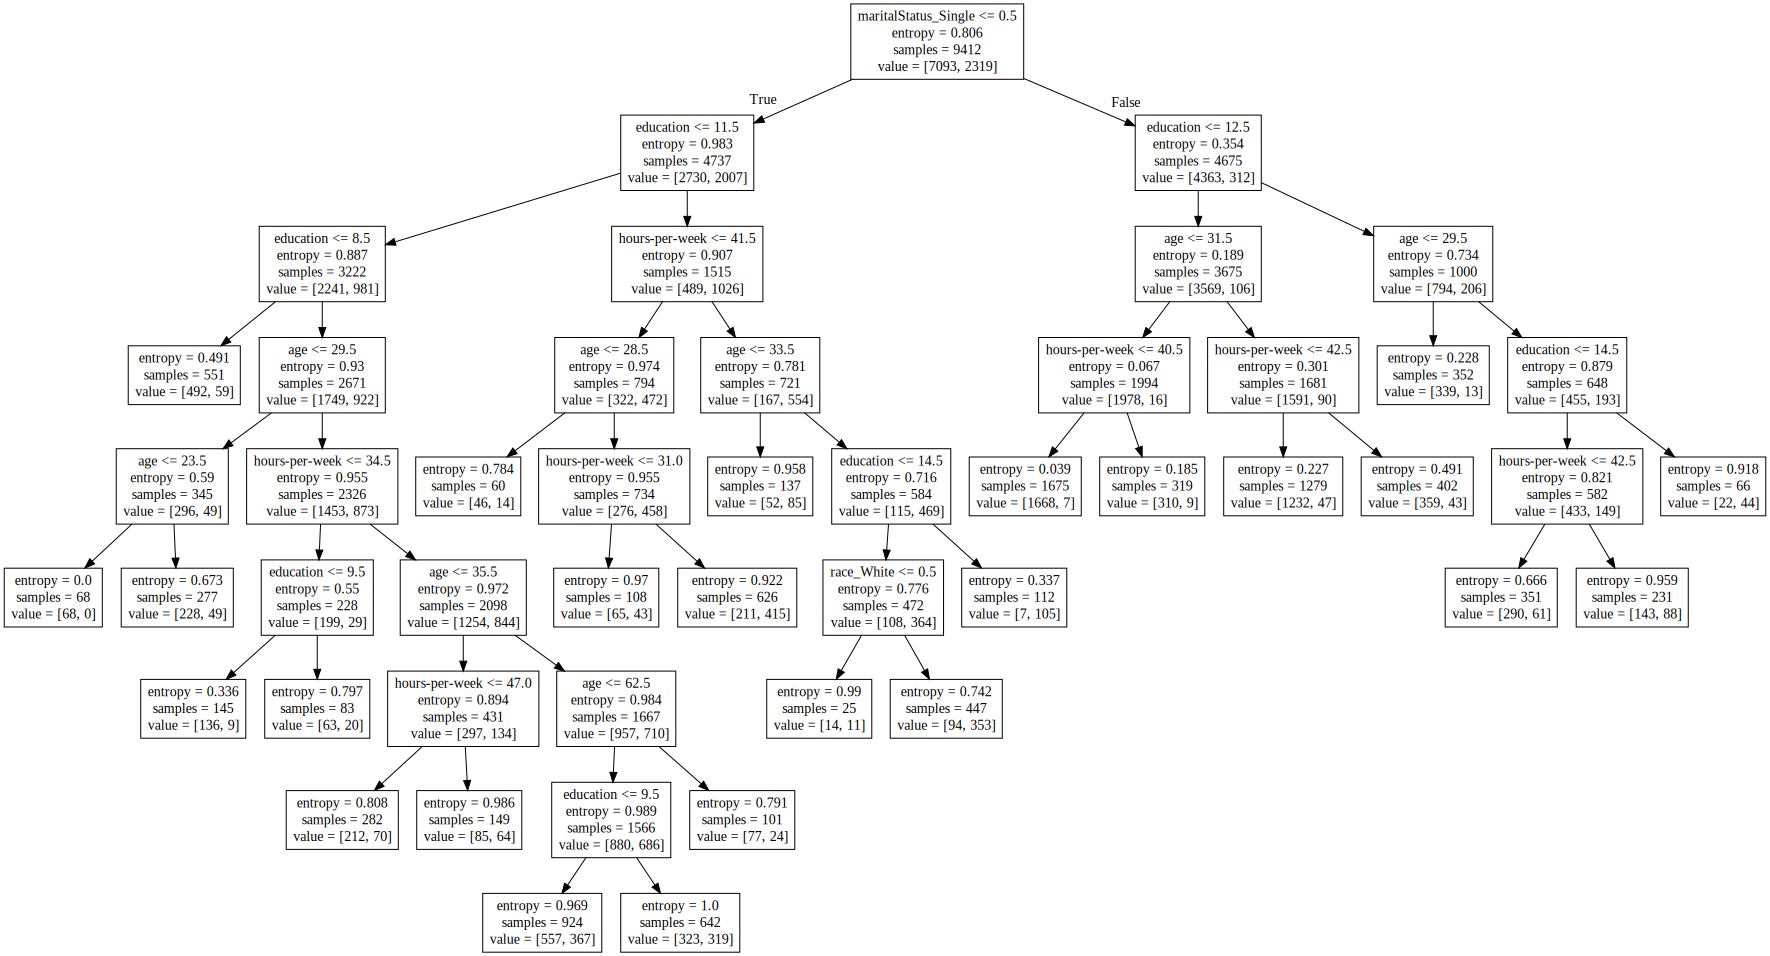

In [41]:
import graphviz

with open("tree_new.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)